In [5]:
x = """
카이제곱 검정 : 분산 검정, 모집단이 하나일 경우  평균에 대해 어느 정도의 산포가 나타나는지를 살펴보는 가설검증    
F (분포) 검정 : 분산비 검정, 모집단이 둘 일 경우 독립적인 두 카이제곱분포에 관한 비로써 정의된다
                   자유도는 분자에 해당하는 카이제곱분포의 자유도와 분모에 해당하는 카이제곱분포의 자유도에 의해 결정된다
""" 

In [6]:
x = """

# F Test in R

> boy <-  c(46,47,58,47,27,58,56,26,47,25)
> girl <- c(78,57,31,28,67,77,36,57,36,57)
> var.test(boy,girl)

	F test to compare two variances

data:  boy and girl
F = 0.4923, num df = 9, denom df = 9, p-value = 0.306
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1222795 1.9819824
sample estimates:
ratio of variances 
         0.4922964 

> var.test(girl,boy)

	F test to compare two variances

data:  girl and boy
F = 2.0313, num df = 9, denom df = 9, p-value = 0.306
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5045454 8.1779885
sample estimates:
ratio of variances 
          2.031297 
"""

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
boy  = [46,47,58,47,27,58,56,26,47,25]
girl = [78,57,31,28,67,77,36,57,36,57]

In [3]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 분자
    dfd = y.size-1 #define degrees of freedom denominator 분모
    
    # One-tailed test
    # p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    
    # Two-tailed test
    rv = stats.f(dfn, dfd)
    one_pval = rv.cdf(f) # single_tailed_pval
    # or simply => c = stats.f.cdf(f, dfn, dfd) 
    
    p = min(one_pval, 1-one_pval) * 2
    
    return f, p

In [4]:
f_test(boy, girl)

(0.4922963815368879, 0.3059622564213057)

In [5]:
f_test(girl, boy)

(2.0312966690474643, 0.3059622564213056)

In [7]:
# 기타

In [7]:
fdistribution = stats.f(len(boy)-1,len(girl)-1) # 자유도 d1=9 (boy), d2=9 (girl)의 F 분포

In [8]:
# scipy.stats.rv_continuous.ppf
# Percent point function (inverse of cdf) at q of the given RV.

f_critical1 = fdistribution.ppf(0.025)
f_critical2 = fdistribution.ppf(0.975)
print("F 통계량 범위", f_critical1, f_critical2)

F 통계량 범위 0.24838585469445493 4.025994158282978


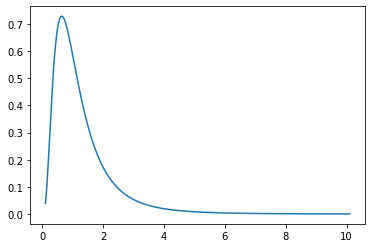

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(fdistribution.ppf(0.001), fdistribution.ppf(0.999), 1000)
y = fdistribution.pdf(x) 

plt.plot(x,y)

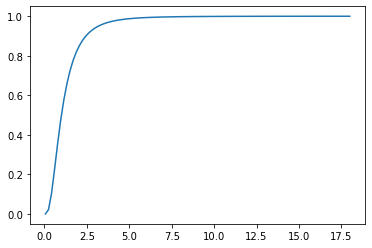

In [11]:
x = np.linspace(fdistribution.ppf(0.0001), fdistribution.ppf(0.9999), 100)
y = fdistribution.cdf(x) 

plt.plot(x,y)

In [2]:
print(stats.f.__doc__)

An F continuous random variable.

    As an instance of the `rv_continuous` class, `f` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(dfn, dfd, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, dfn, dfd, loc=0, scale=1)
        Probability density function.
    logpdf(x, dfn, dfd, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, dfn, dfd, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, dfn, dfd, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, dfn, dfd, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, dfn, dfd, loc=0, scale=1)
        Log of the survival function.
    ppf(q, dfn, dfd, loc=0, scale=1)
        Percent point function (inverse of ``cd